In [1]:
# DSC 530,Spring 2023 - T301 Data Exploration and Analytics(2235-1)
# Assignment: Week 12 - 12.2 Assignment: Term Project
# Author by:  Debabrata Mishra
# Date: 2023-06-03

# Term Project: Credit Card Fraud Detection EDA

# Credit Card Fraud Detection (Transactional ) EDA

## Overview 

Credit card fraud is a growing concern for financial institutions, merchants, and consumers alike. With the increasing use of credit cards for online transactions, the opportunity for fraudsters to commit fraudulent activities has increased dramatically. Due to the technological innovation and the emergence of a new Payment techniques, we do see huge increase in BOT attacks, Account takeover, new account fraud, cloned cards, cards-not-present schemes and mobile payments. Such widespread acceptance of cashless transactions leads fraudsters to carry out fraudulent attacks regularly and change their tactics to avoid detection.


## Identifying business problems

Impact to business and individual customers due to financial loss

Inconvience to customers

Compliance and legal issues

Impact the expantation of existing business or start of new business

Cost of chargebacks

## What I intend to analyze


The objectives of my analysis are as follows

Dataset Overview: I will explore the dataset to determine the number of instances (observations) and features (variables) it contains.

Target Variable Distribution: I will investigate the distribution of the target variable to understand the proportion of fraud and non-fraud instances in the dataset.

Missing Values: I will identify if there are any missing values in the dataset and quantify their extent. Additionally, I will examine the distribution of missing values across features.

Feature Correlation: I will assess the correlation between different features in the dataset to identify potential relationships or dependencies among variables.

Geographical Patterns: I will explore if there are any geographical patterns in the occurrence of fraud transactions, which could indicate specific regions with higher or lower fraud rates.

Transaction Behavior Differences: I will compare the transaction behavior between fraud and non-fraud instances, focusing on variables such as transaction amount and transaction frequency, to identify any notable differences.

Relationship with Target Variable: I will examine the relationships between the target variable (fraud vs. non-fraud) and other features in the dataset to determine if any variables are particularly informative for fraud detection.

Outliers: I will identify and analyze any outliers present in the dataset, quantifying their frequency and distribution across variables.

# Analysis, Code and Relevant results

In [2]:
# Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix,auc
from sklearn.metrics import roc_auc_score,roc_curve,precision_score

import statsmodels.api as sm
from scipy.stats import norm, lognorm

from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import warnings
from matplotlib import rcParams
from matplotlib import rcParams

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# Suppress warning messages 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

rcParams['figure.figsize'] = 11.7,8.27
rcParams.update({'font.size': 8})

In [3]:
# Read and Load the dataset
data = pd.read_csv('ds_fraud_txn.csv')
data.shape

(1296675, 23)

In [4]:
# Check the data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# Overview of the structure and characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
# Modification activities

# Rename and data elements formatting
data.rename(columns = {'Unnamed: 0':'id', 'cc_num':'accountNumber', 'amt':'amount'}, inplace = True)
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'],errors='coerce')

# Categories of date and time
data['year']=data['trans_date_trans_time'].dt.year
data['month']=data['trans_date_trans_time'].dt.strftime('%b')
data['month']=data['trans_date_trans_time'].dt.month
data['day']=data['trans_date_trans_time'].dt.day
data['hour']=data['trans_date_trans_time'].dt.hour
data['weekday']=data['trans_date_trans_time'].dt.strftime('%a')
data['dayofYear']=data['trans_date_trans_time'].dt.dayofyear

data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['txn_date']=data['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
data['txn_date']=pd.to_datetime(data['txn_date'])
data['dob']=pd.to_datetime(data['dob'])

# Create a variable age of customer on day of transaction

data["age"] =data["txn_date"]-data["dob"]
data["age"] =data["age"].astype('timedelta64[Y]')

In [7]:
# check the data after modification
data.head()

,id,trans_date_trans_time,accountNumber,merchant,category,amount,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,weekday,dayofYear,txn_date,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1,1,0,Tue,1,2019-01-01,30.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1,1,0,Tue,1,2019-01-01,40.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1,1,0,Tue,1,2019-01-01,56.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,1,1,0,Tue,1,2019-01-01,51.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,1,1,0,Tue,1,2019-01-01,32.0


In [8]:
# Overview of the structure and characteristics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   accountNumber          1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amount                 1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [9]:
# Get the count and peercentage of Confirmed Fraud and Not-Fraud records
Num_of_Fraud = round(data['is_fraud'].value_counts()[1]/len(data)*100,3)
Num_of_NonFraud = round(data['is_fraud'].value_counts()[0]/len(data)*100,3)

print("Number of Confirmed Fraud Records            :",data['is_fraud'].value_counts()[1])
print("Number of Non-Fraud Records                  :",data['is_fraud'].value_counts()[0])
print("\n")
print("Percentage of Confirmed Fraud Records        :", Num_of_Fraud,"%")
print("Percentage of Not-Fraud Records              :",Num_of_NonFraud,"%")

Number of Confirmed Fraud Records            : 7506
Number of Non-Fraud Records                  : 1289169


Percentage of Confirmed Fraud Records        : 0.579 %
Percentage of Not-Fraud Records              : 99.421 %


In [10]:
# Lets shuffle the data before creating the subsamples
data = data.sample(frac=1)

# amount of fraud classes
fraud_df = data.loc[data['is_fraud'] == 1]
non_fraud_df = data.loc[data['is_fraud'] == 0]
normal_distributed_df = pd.concat([fraud_df])

# Shuffle dataframe rows for a sub sample of confirmed fraud data
subsample_analysis_df = normal_distributed_df.sample(frac=1, random_state=42)

#  Describing the Variables

In [11]:
# 1. Describing some of the Variables
variable_descriptions = {
    'amount': 'The amount of the transaction',
    'is_fraud': 'Status of the transaction , 0: Not-Fraud , 1: Confirmed Fraud',
    'city': 'The city where merchant is regustered/located  or city where the transaction occured',
    'state': 'The state where merchant is regustered/located  or state where the transaction occured',
    'day': 'The state where merchant is regustered/located  or state where the transaction occured',
    'age': 'The age of the customer at time of transaction',
    'Category': 'The merchant/business category and type of transaction occured like POS vs Ecomm',
    'weekday': 'day of the week when transaction occured',
    'trans_date_trans_time': 'Local date and time when transaction occured '
}

# Print variable descriptions
for var, desc in variable_descriptions.items():
    print(f"{var}","     :",f"{desc}")

amount      : The amount of the transaction
is_fraud      : Status of the transaction , 0: Not-Fraud , 1: Confirmed Fraud
city      : The city where merchant is regustered/located  or city where the transaction occured
state      : The state where merchant is regustered/located  or state where the transaction occured
day      : The state where merchant is regustered/located  or state where the transaction occured
age      : The age of the customer at time of transaction
Category      : The merchant/business category and type of transaction occured like POS vs Ecomm
weekday      : day of the week when transaction occured
trans_date_trans_time      : Local date and time when transaction occured 


# Descriptive Characteristics

In [12]:
# Descriptive Characteristics
data.describe()

,id,accountNumber,amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,dayofYear,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,2.019287e+03,6.142150e+00,1.558798e+01,1.280486e+01,1.713139e+02,4.549592e+01
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,4.522452e-01,3.417703e+00,8.829121e+00,6.817824e+00,1.043757e+02,1.739739e+01
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.300000e+01
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.019000e+03,3.000000e+00,8.000000e+00,7.000000e+00,8.700000e+01,3.200000e+01
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,2.019000e+03,6.000000e+00,1.500000e+01,1.400000e+01,1.550000e+02,4.300000e+01
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,2.020000e+03,9.000000e+00,2.300000e+01,1.900000e+01,2.550000e+02,5.700000e+01
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,3.650000e+02,9.500000e+01


In [13]:
# Descriptive Characteristics - Confirmed Fraud data
fraud_df.describe()

,id,accountNumber,amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,dayofYear,age
count,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.000000,7506.000000,7.506000e+03,7.506000e+03,7506.000000,7506.000000,7506.0,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000,7506.000000
mean,6.249497e+05,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,9.727676e+04,1.348389e+09,38.653901,-89.915808,1.0,2019.304556,5.586331,16.033173,14.037836,154.934186,48.288836
std,4.010560e+05,1.276871e+18,390.560070,27265.558212,5.172289,14.278221,3.265815e+05,1.383020e+07,5.218387,14.298685,0.0,0.460250,3.454753,8.709623,9.702306,105.508070,18.849917
min,2.449000e+03,6.041621e+10,1.060000,1330.000000,20.027100,-165.672300,2.300000e+01,1.325466e+09,19.425114,-166.550779,1.0,2019.000000,1.000000,1.000000,0.000000,1.000000,14.000000
25%,2.398565e+05,1.800429e+14,245.662500,24927.000000,35.056100,-96.701000,7.465000e+02,1.335744e+09,35.114671,-96.671038,1.0,2019.000000,3.000000,9.000000,2.000000,67.000000,32.000000
50%,6.381620e+05,3.528041e+15,396.505000,46290.000000,39.433600,-86.691900,2.623000e+03,1.348872e+09,39.427008,-86.813044,1.0,2019.000000,5.000000,16.000000,22.000000,135.000000,47.000000
75%,9.849215e+05,4.651007e+15,900.875000,71107.000000,42.073175,-79.941600,2.143700e+04,1.360021e+09,41.986902,-79.907096,1.0,2020.000000,8.000000,23.000000,23.000000,243.000000,60.000000
max,1.295733e+06,4.992346e+18,1376.040000,99783.000000,66.693300,-68.556500,2.906700e+06,1.371787e+09,67.510267,-67.569238,1.0,2020.000000,12.000000,31.000000,23.000000,365.000000,93.000000


# Plot Histogram

## Plot Histogram for each variable of full dataset

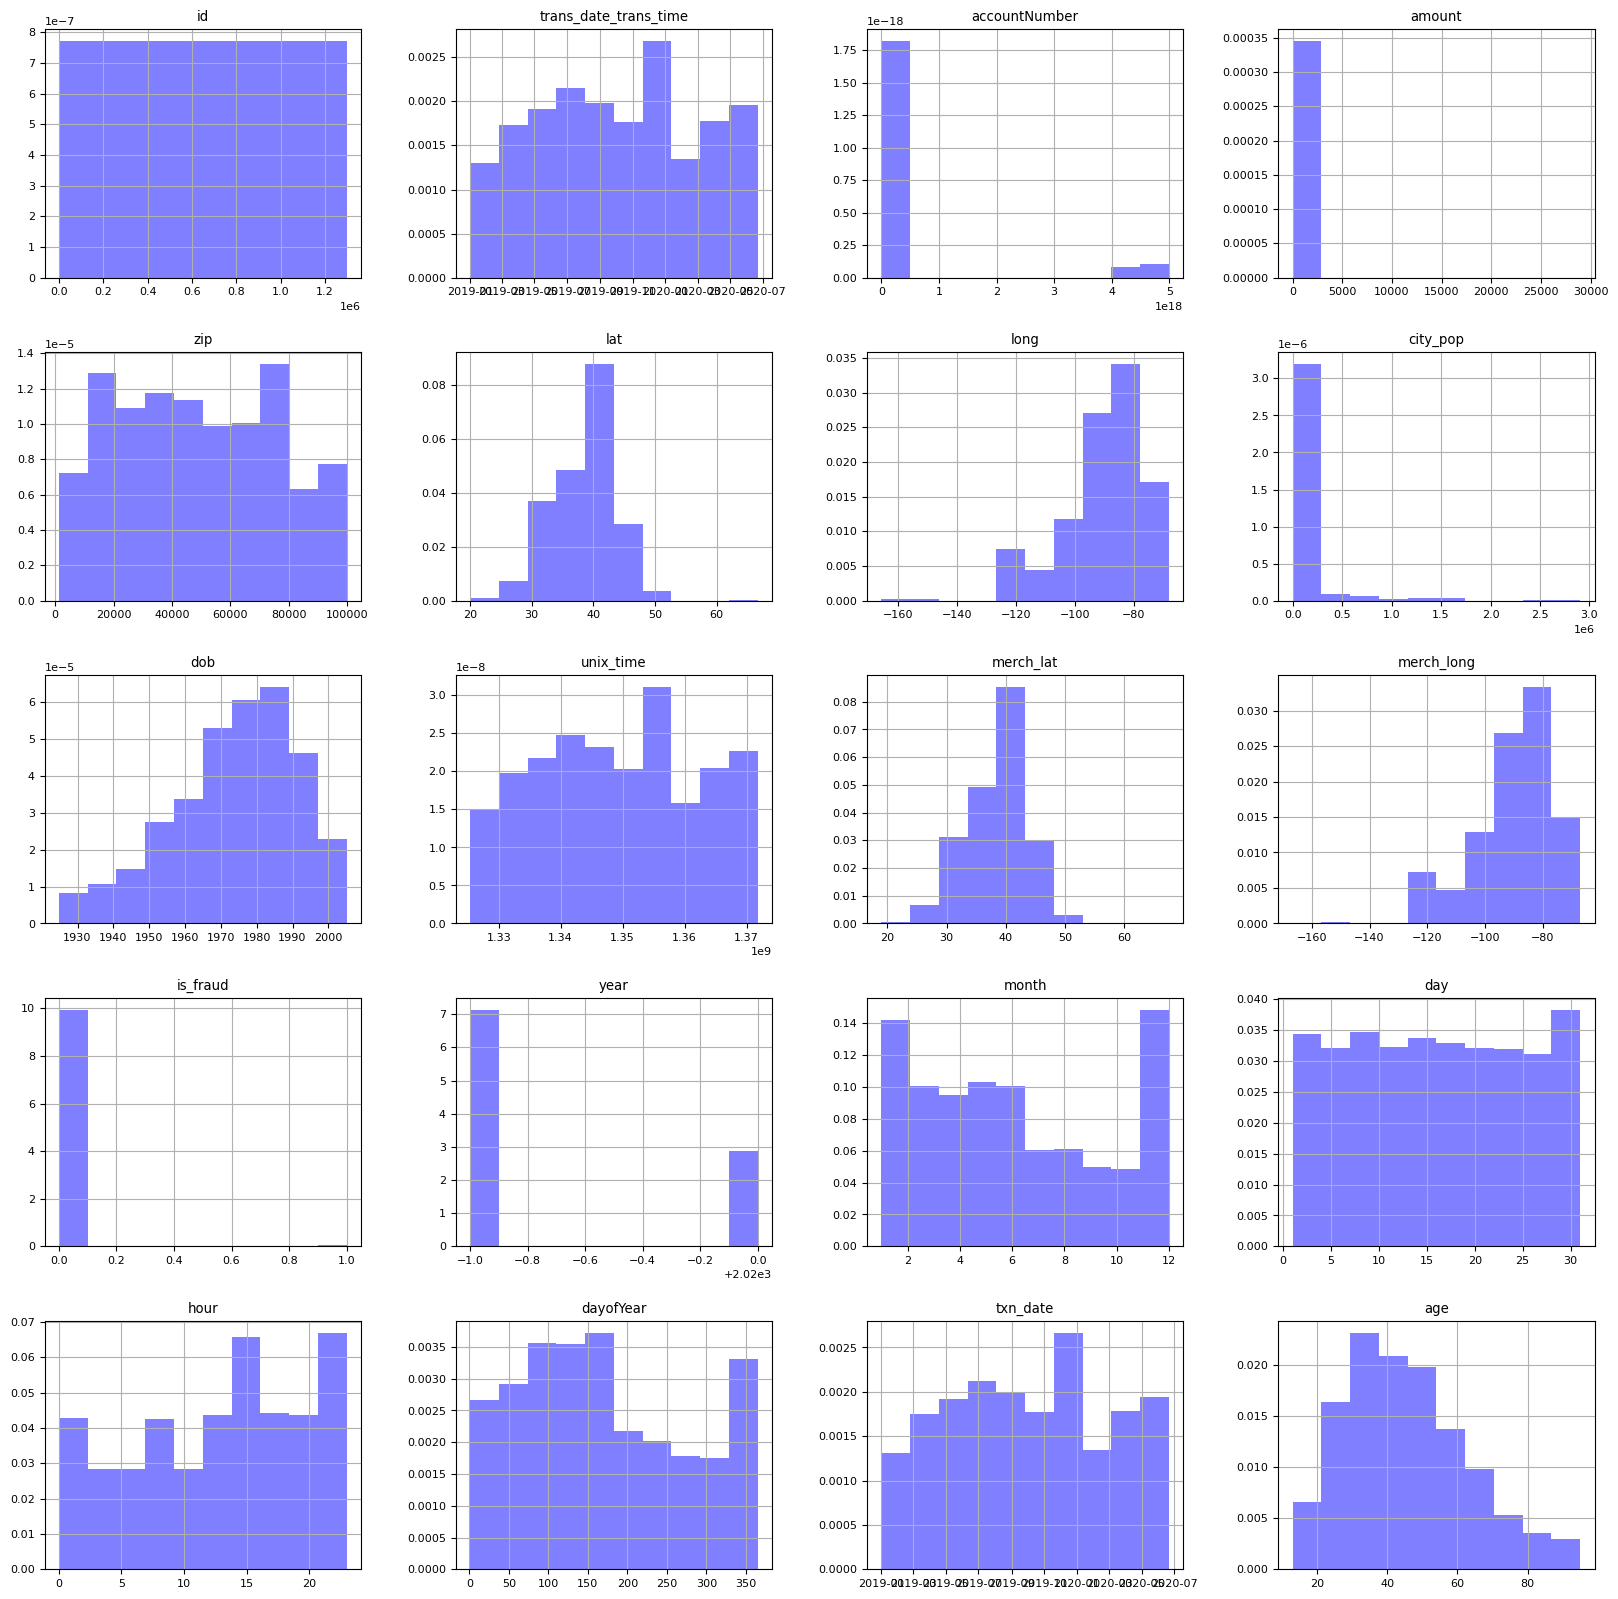

In [14]:
#plot histogram of each variable
data.hist(figsize=(20,20),facecolor='blue',density=True,alpha=0.5)
plt.show()

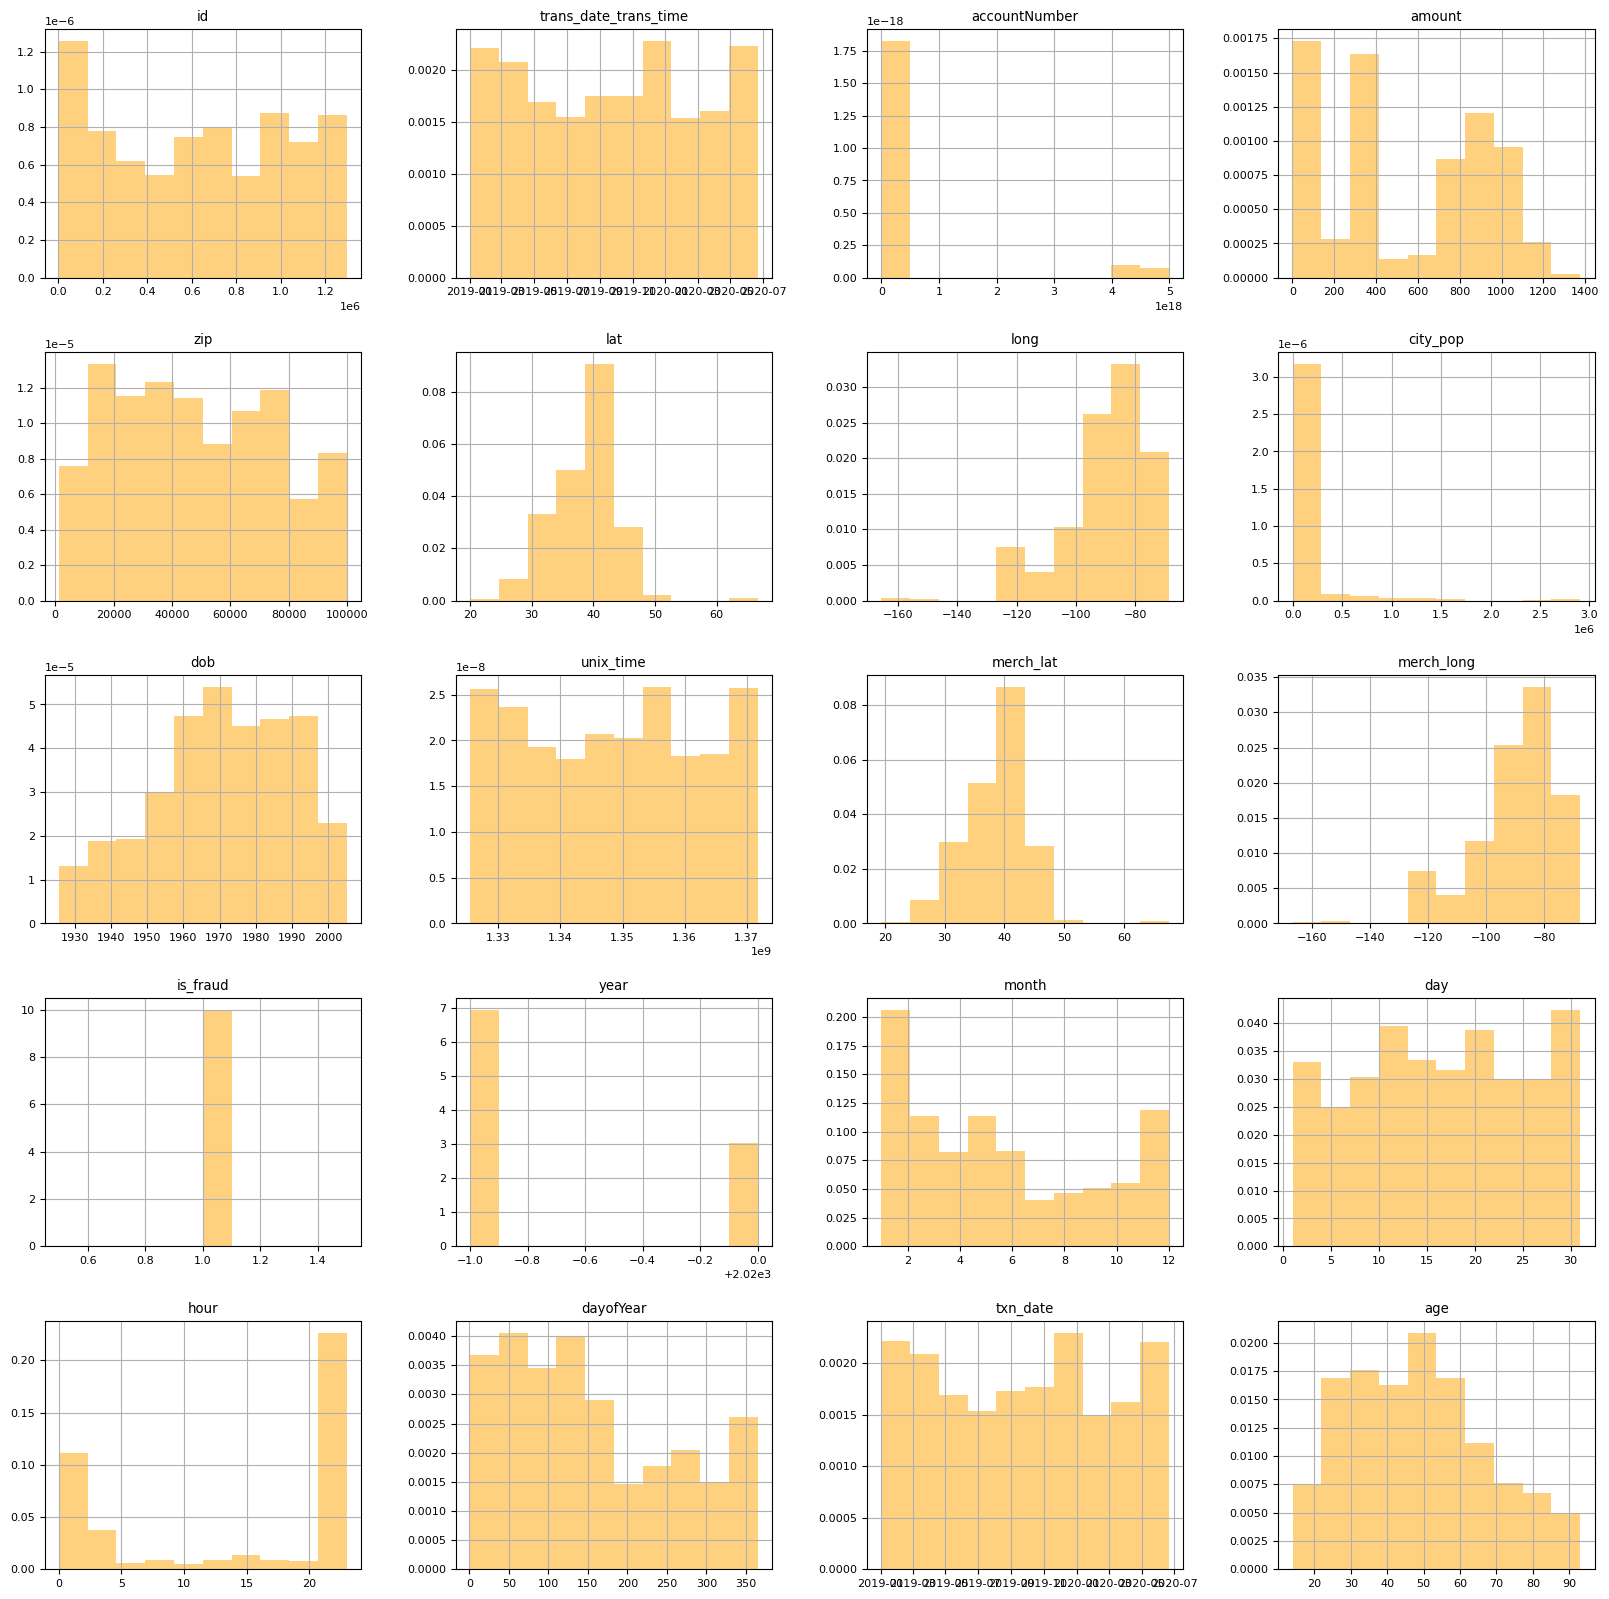

In [15]:
#plot histogram of each variabale of confirmed fraud data
fraud_df.hist(figsize=(20,20),facecolor='orange',density=True,alpha=0.5)
plt.show()

## Plot Histogram for selected variables

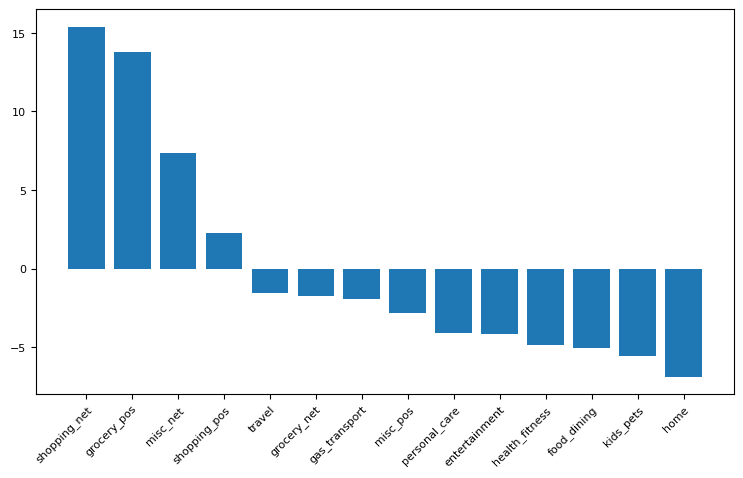

In [16]:
#  Category -  Fraud Vs Not-Fraud ( 0- Not-Fraud , 1 - Fraud)
x = data[data['is_fraud']== 1]['category']
y = data[data['is_fraud']== 0]['category']


a1 = x.value_counts(normalize=True)
a2 = y.value_counts(normalize=True)
z = (a1 - a2)*100
z = z.sort_values(ascending=False)

cat = z.index
freq = z.values
positions = range(len(cat))

plt.figure(figsize=(9,5))
plt.bar(positions, freq  )
plt.xticks(positions,cat, rotation=45, ha="right",rotation_mode='anchor', wrap=True)

plt.show()

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

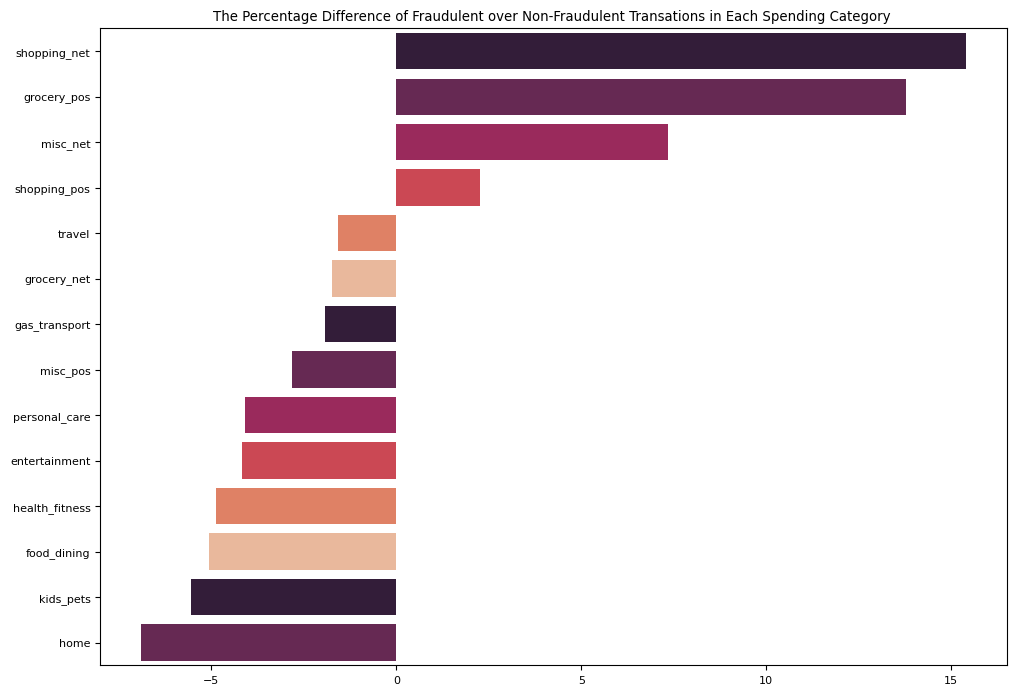

In [17]:
#  Category -  Fraud Vs Not-Fraud ( 0- Not-Fraud , 1 - Fraud)
color = sns.color_palette("rocket")
ax = sns.barplot(y=cat, x = freq,palette=color)
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

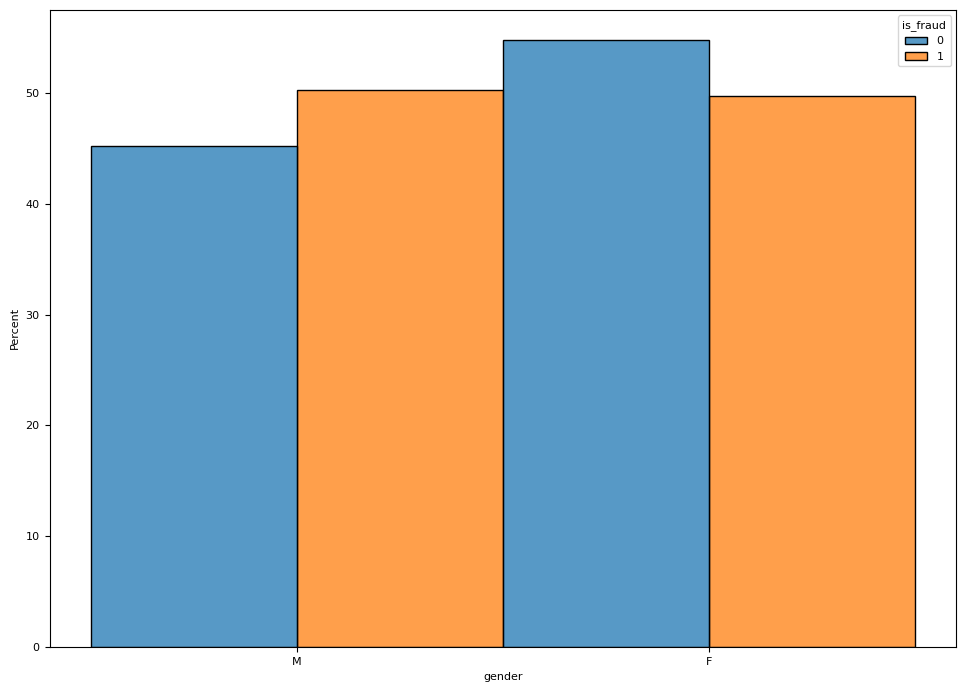

In [18]:
#  Gender - Fraud Vs Not-Fraud ( 0- Not-Fraud , 1 - Fraud)
ax = sns.histplot(x='gender', data=data,stat='percent',hue='is_fraud',multiple='dodge', common_norm=False)

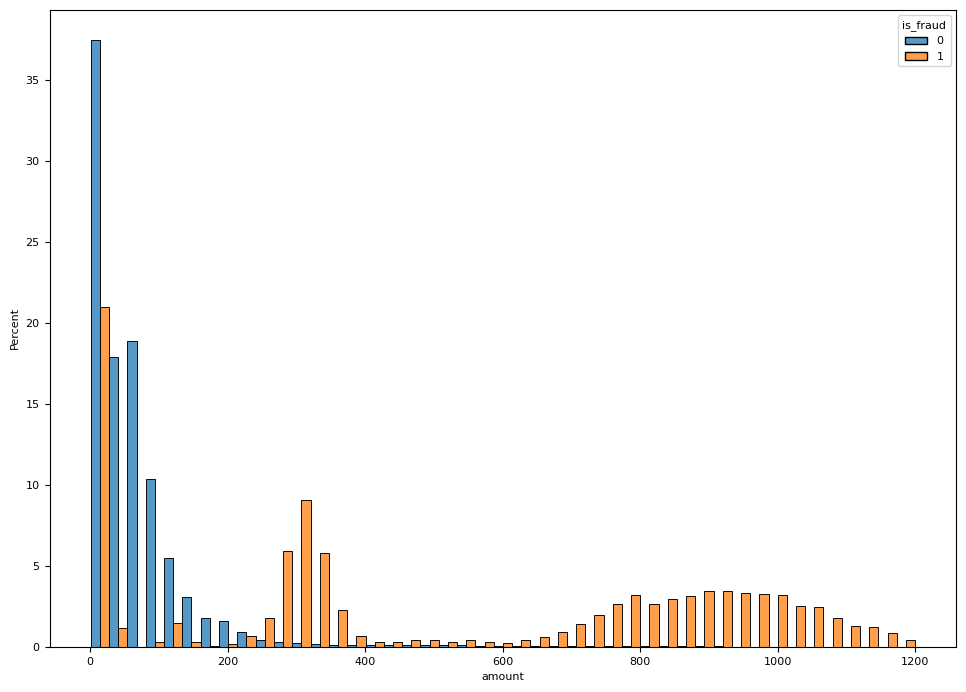

In [19]:
# Amount - Fraud Vs Not-Fraud ( 0- Not-Fraud , 1 - Fraud)
ax=sns.histplot(x='amount',data=data[data.amount<=1200],hue='is_fraud',stat='percent',multiple='dodge'
                ,common_norm=False,bins=45)

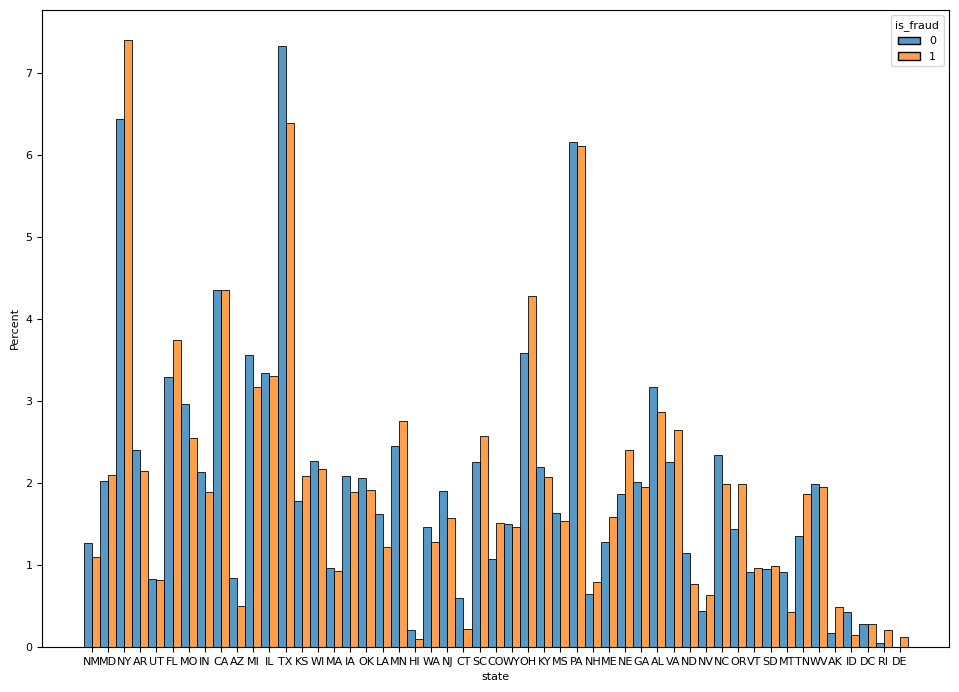

In [20]:
# State- Fraud Vs Not-Fraud ( 0- Not-Fraud , 1 - Fraud)
ax=sns.histplot(x='state',data=data,hue='is_fraud',stat='percent',multiple='dodge'
                ,common_norm=False,bins=45)

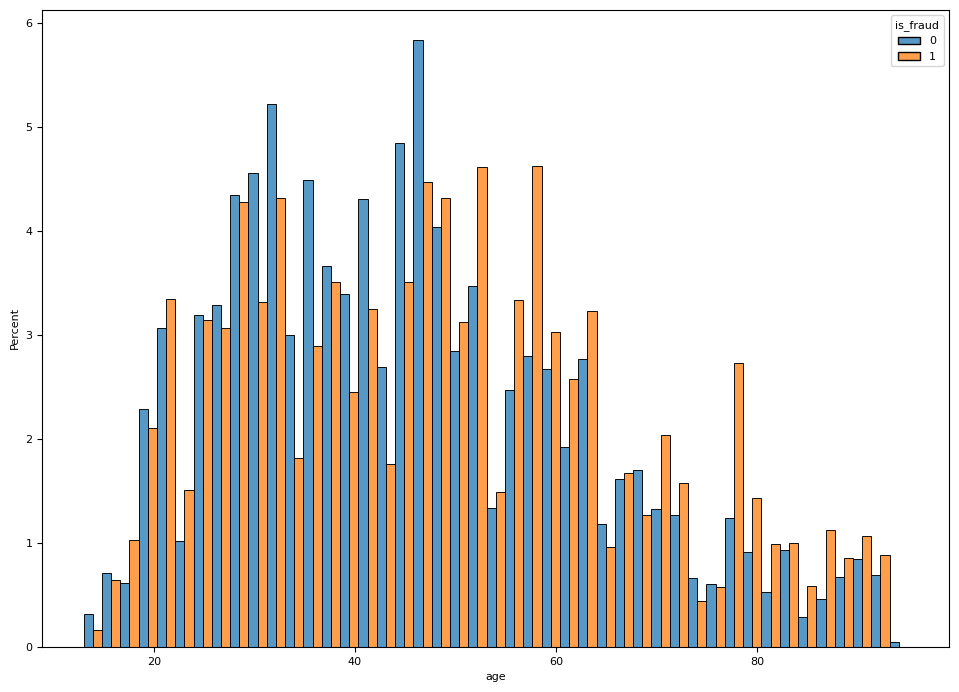

In [21]:
# age- Fraud Vs Not-Fraud ( 0- Not-Fraud , 1 - Fraud)
ax=sns.histplot(x='age',data=data,hue='is_fraud',stat='percent',multiple='dodge'
                ,common_norm=False,bins=45)

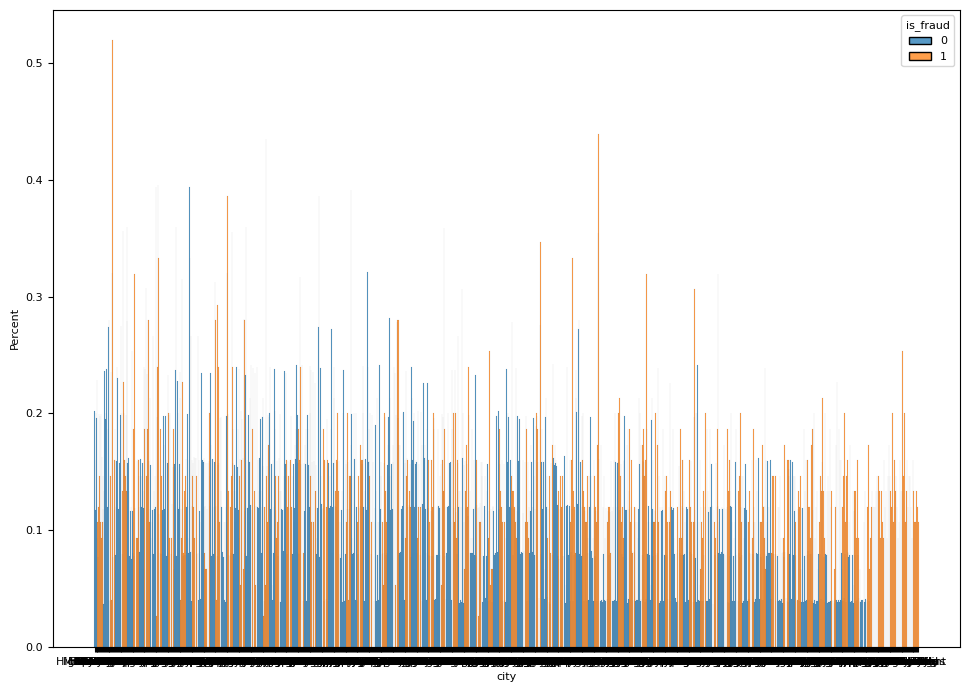

In [22]:
# City- Fraud Vs Not-Fraud ( 0- Not-Fraud , 1 - Fraud)
ax=sns.histplot(x='city',data=data,hue='is_fraud',stat='percent',multiple='dodge'
                ,common_norm=False,bins=45)

# Probability Mass Function (PMF)

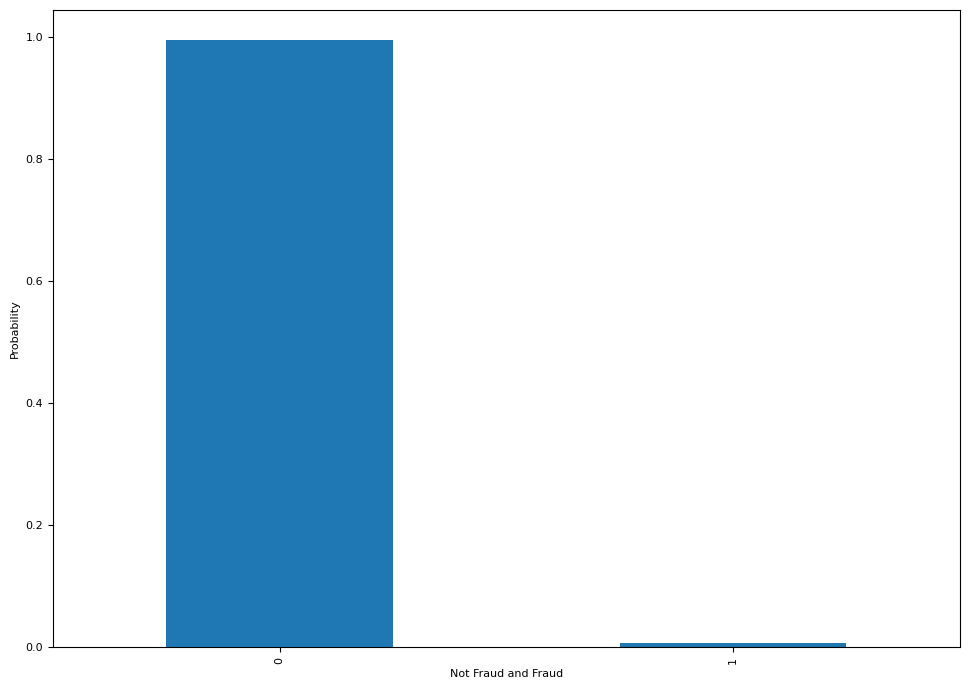

In [23]:
# Create a new dataframe containing only the "is fraud" column
class_df = data[["is_fraud"]]

# Calculate the probability mass function
pmf = class_df["is_fraud"].value_counts(normalize=True)

# Plot the probability mass function
pmf.plot(kind="bar")
plt.xlabel("Not Fraud and Fraud")
plt.ylabel("Probability")
plt.show()



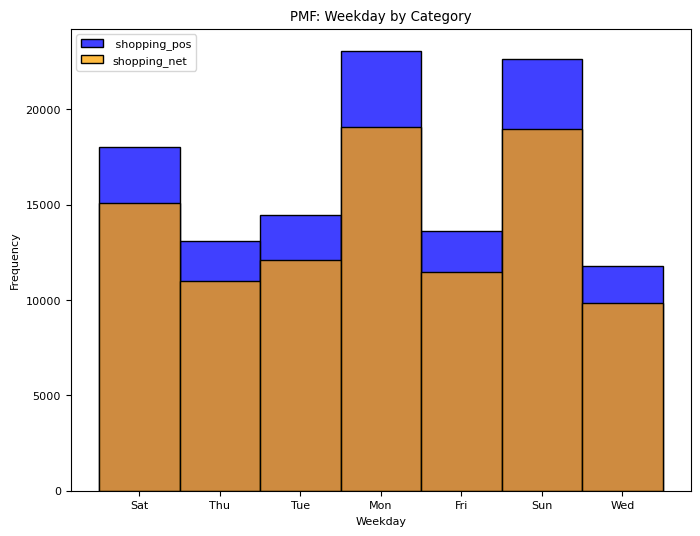

In [24]:
# PMF for Weekday by Category
scenario_1 = data[data['category'] == 'shopping_pos']
scenario_2 = data[data['category'] == 'shopping_net']

plt.figure(figsize=(8, 6))
sns.histplot(scenario_1['weekday'], kde=False, color='blue', label=' shopping_pos')
sns.histplot(scenario_2['weekday'], kde=False, color='orange', label='shopping_net')
plt.title('PMF: Weekday by Category')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Cumulative Distribution Function (CDF)

<Figure size 800x600 with 0 Axes>

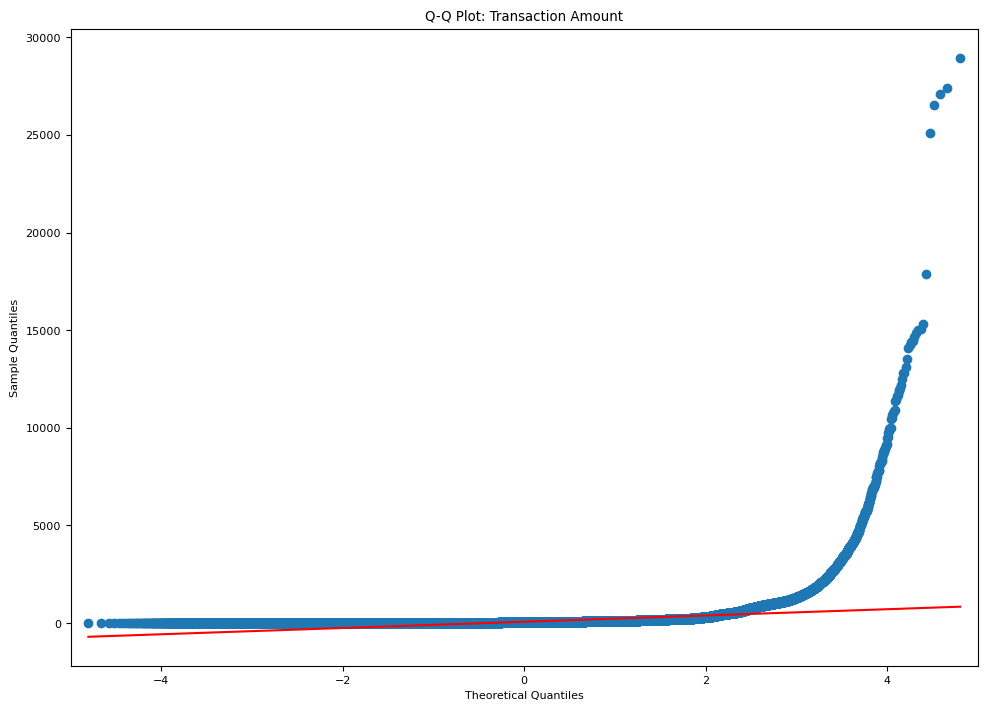

In [25]:
# Cumulative Distribution Function (CDF)
plt.figure(figsize=(8, 6))
sm.qqplot(data['amount'], line='s')
plt.title('Q-Q Plot: Transaction Amount')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

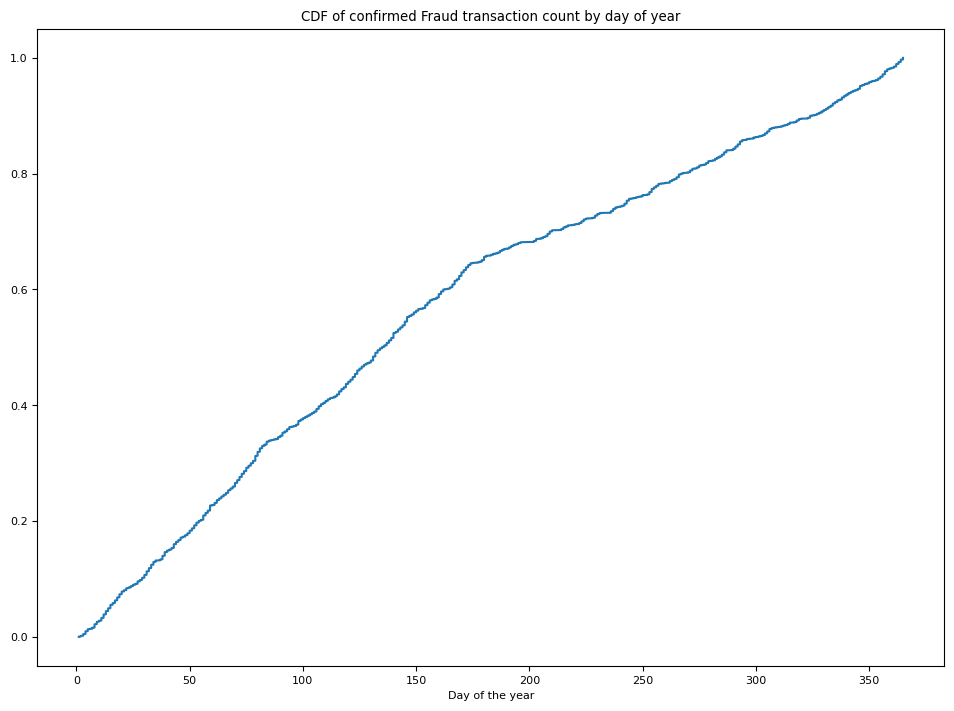

In [26]:
# CDF of confirmed Fraud transaction count by day of year
data_cdf_plot = fraud_df.dayofYear
x = np.sort(data_cdf_plot)
y = np.arange(len(x))/float(len(x)-1)

# plotting
plt.xlabel('Day of the year')
plt.title('CDF of confirmed Fraud transaction count by day of year')
plt.plot(x, y)

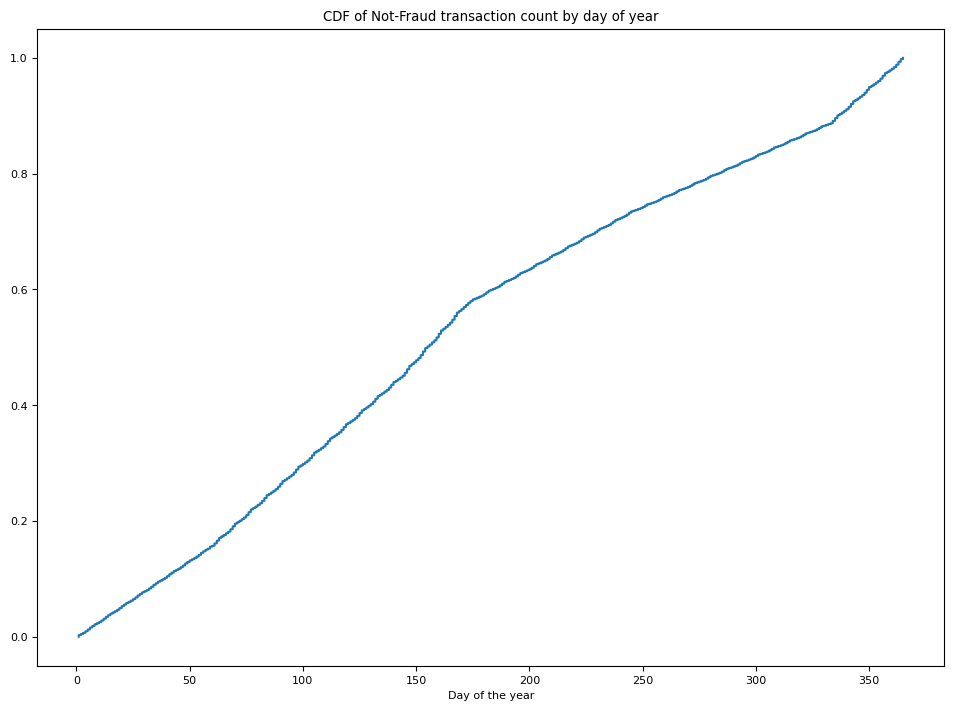

In [27]:
# CDF of Not-Fraud transaction count by day of year
data_cdf_plot_nf = non_fraud_df.dayofYear
x = np.sort(data_cdf_plot_nf)
y = np.arange(len(x))/float(len(x)-1)

# plotting
plt.xlabel('Day of the year')
plt.title('CDF of Not-Fraud transaction count by day of year')
plt.plot(x, y)

# Analytical Distribution

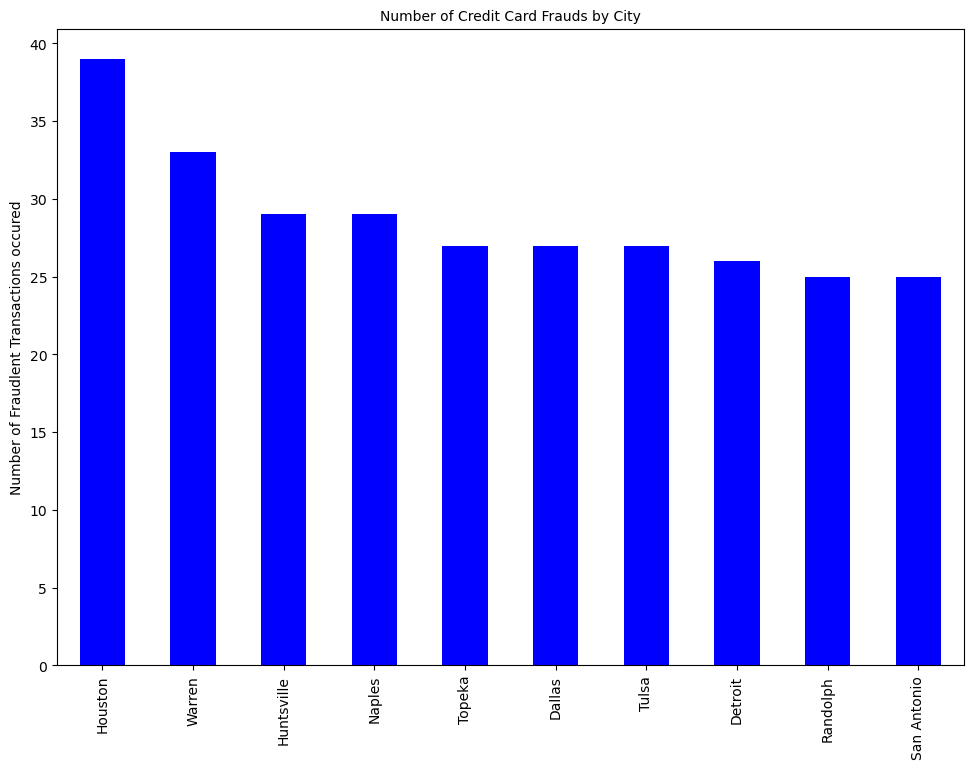

In [28]:
# Confirmed Fraud Transactions occurence by City
plt.rcParams.update({'font.size': 10})
fraud_df.city.value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color='blue')
plt.ylabel('Number of Fraudlent Transactions occured', fontsize=10)
plt.title("Number of Credit Card Frauds by City", fontsize=10)
plt.show()

<AxesSubplot:title={'center':'Number of Confirmed Fraud transactions by Age Groups'}, xlabel='Age Group', ylabel='Fraudlent Transactions Occured'>

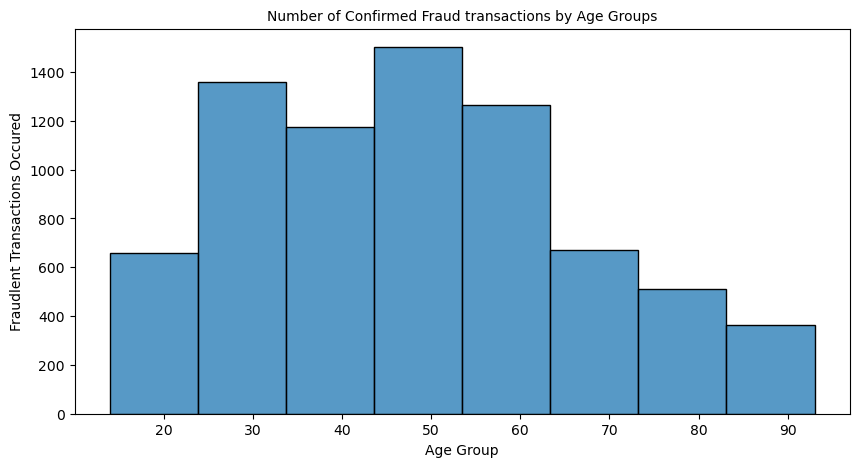

In [29]:
# Confirmed Fraud Transactions occurence by Age Group
plt.figure(figsize=(10,5))
plt.title("Number of Confirmed Fraud transactions by Age Groups", fontsize=10)
plt.ylabel('Fraudlent Transactions Occured', fontsize=10)
plt.xlabel('Age Group', fontsize=10)
sns.histplot(fraud_df.age, bins=8, kde=False)

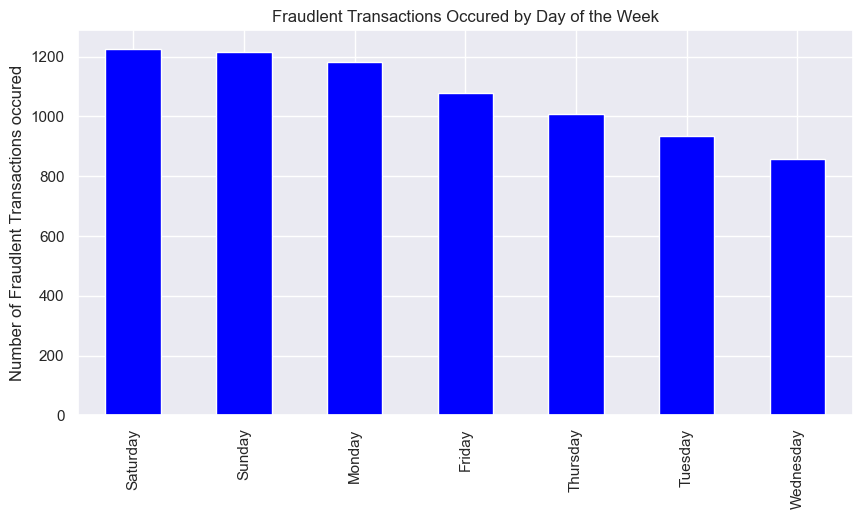

In [30]:
#Fraudlent Transactions occurence by day of week
plt.rcParams.update({'font.size': 10})
sns.set_style('white')
sns.set(rc={'figure.figsize':(10,5)})

fraud_df.trans_date_trans_time.dt.day_name().value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color='blue')
plt.ylabel('Number of Fraudlent Transactions occured')
plt.title('Fraudlent Transactions Occured by Day of the Week')
plt.show()

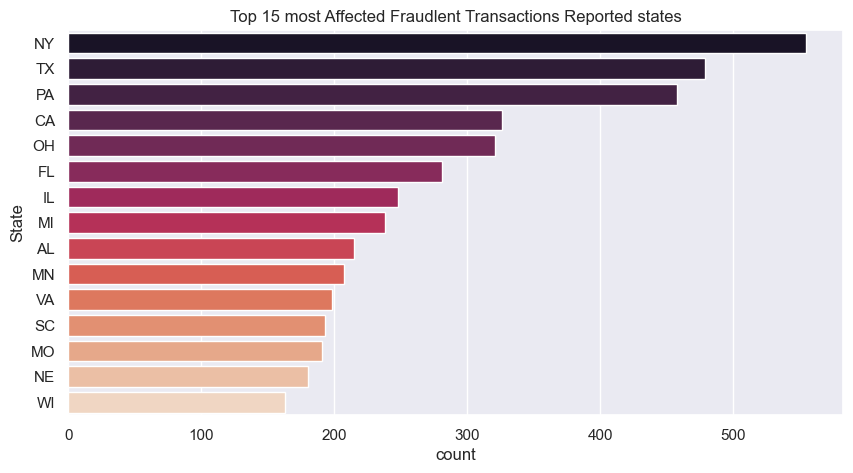

<Figure size 1000x500 with 0 Axes>

In [31]:
# 15 most Affected Fraudlent Transactions Occured states.
state_count15=fraud_df["state"].value_counts().sort_values(ascending=False)[:15]
sns.set_style('white')
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=state_count15.values,y=state_count15.index, palette='rocket')
plt.xlabel('count')
plt.ylabel('State')
plt.title("Top 15 most Affected Fraudlent Transactions Reported states")
plt.show()
plt.savefig('states_plot.jpg', bbox_inches='tight', dpi=150)

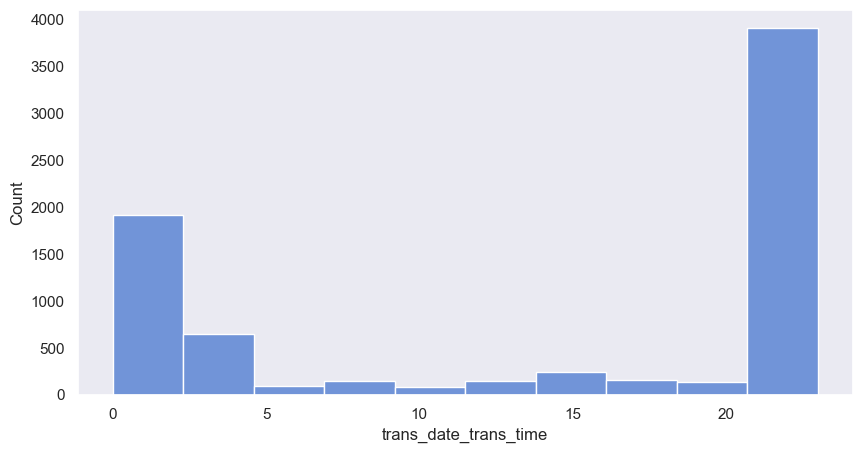

In [32]:
# Time Based analysis
fraud_df['trans_dte_trans_time']= pd.to_datetime(fraud_df.trans_date_trans_time)
hr = fraud_df.trans_date_trans_time.dt.hour
sns.set_style('white')
sns.set(rc={'figure.figsize':(10,5)})
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.histplot(hr,bins=10);


<AxesSubplot:xlabel='Month', ylabel='Fraudlent Transactions Occured'>

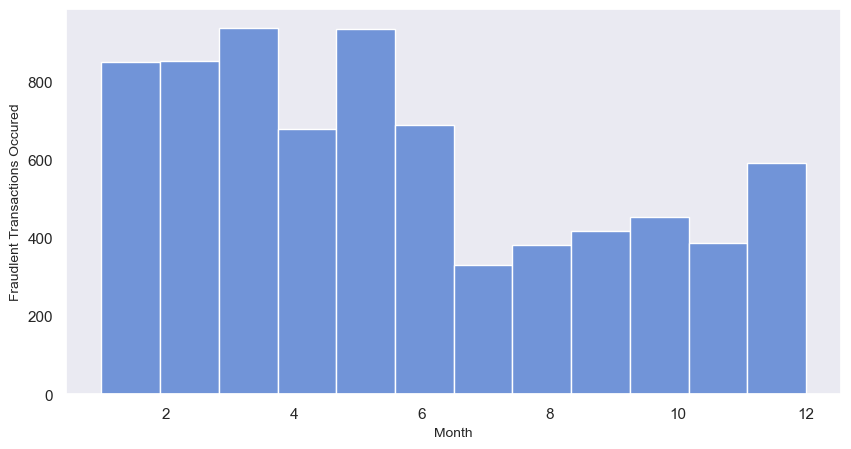

In [33]:
plt.figure(figsize=(10,5))
plt.ylabel('Fraudlent Transactions Occured', fontsize=10)
plt.xlabel('Month', fontsize=10)

# Number of Fraudelent transactions by Month
sns.histplot(fraud_df.month, bins=12, kde=False)

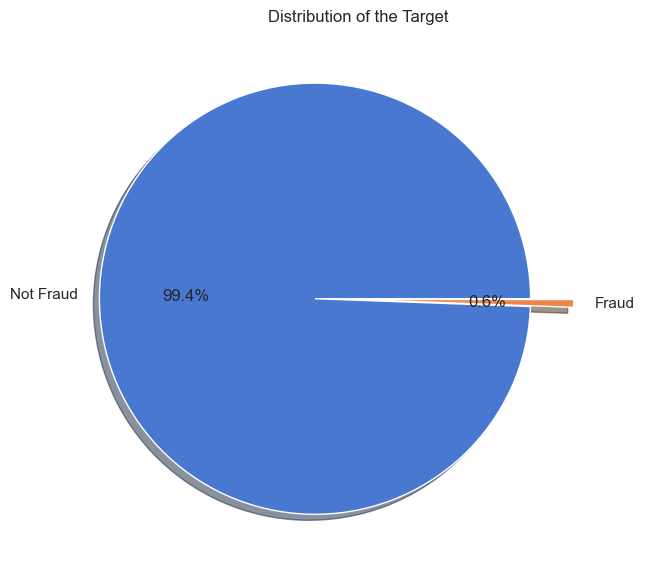

In [34]:
# Check is_fraud variables that has 0 value for Genuine transactions and 1 for␣Fraud
plt.figure(figsize = [7,7])
plot_var = data['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
autopct='%1.1f%%',
labels = ['Not Fraud','Fraud'],
explode = [0.2, 0],
shadow = True) # plotting the pie chart
plt.title('Distribution of the Target');


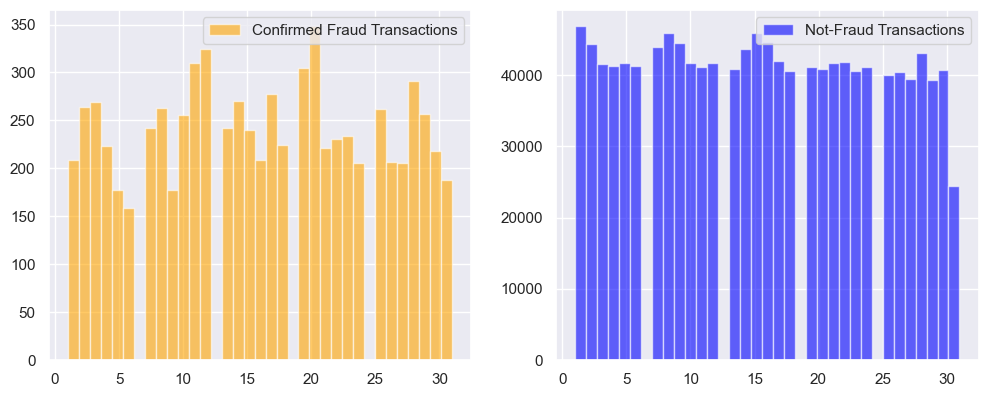

In [35]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
data[data.is_fraud == 1].day.hist(bins=35, color='orange', alpha=0.6,label="Confirmed Fraud Transactions")
plt.legend()
plt.subplot(2, 2, 2)
data[data.is_fraud == 0].day.hist(bins=35, color='blue', alpha=0.6, label="Not-Fraud Transactions")
plt.legend()


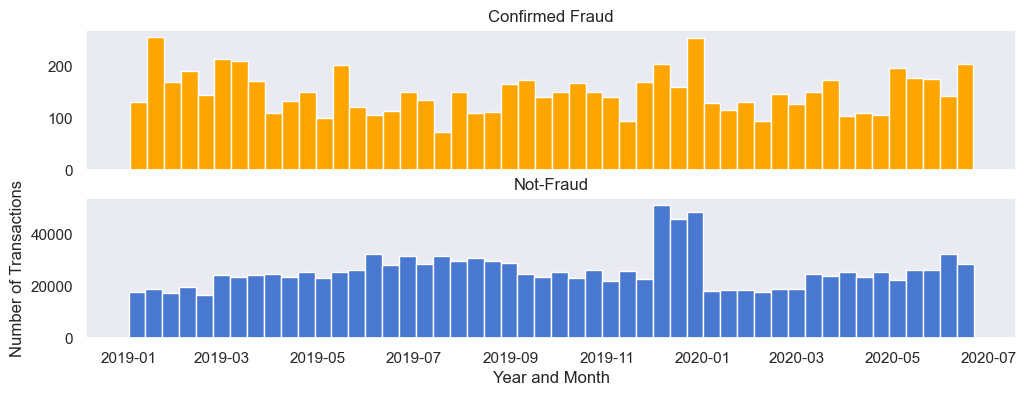

In [36]:
# now checking Time value in case of confirmed Fraud and Not-Fraud Transaction compared␣according to Number of transactions.
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50
axis_1.hist(data.trans_date_trans_time[data.is_fraud == 1], bins = bins,color='orange')
axis_1.set_title('Confirmed Fraud')
axis_2.hist(data.trans_date_trans_time[data.is_fraud == 0], bins = bins)
axis_2.set_title('Not-Fraud')
plt.xlabel('Year and Month')
plt.ylabel('Number of Transactions')
plt.show()


,count,distribution
Not-Fraud,1289169,99.421135
Confirmed Fraud,7506,0.578865


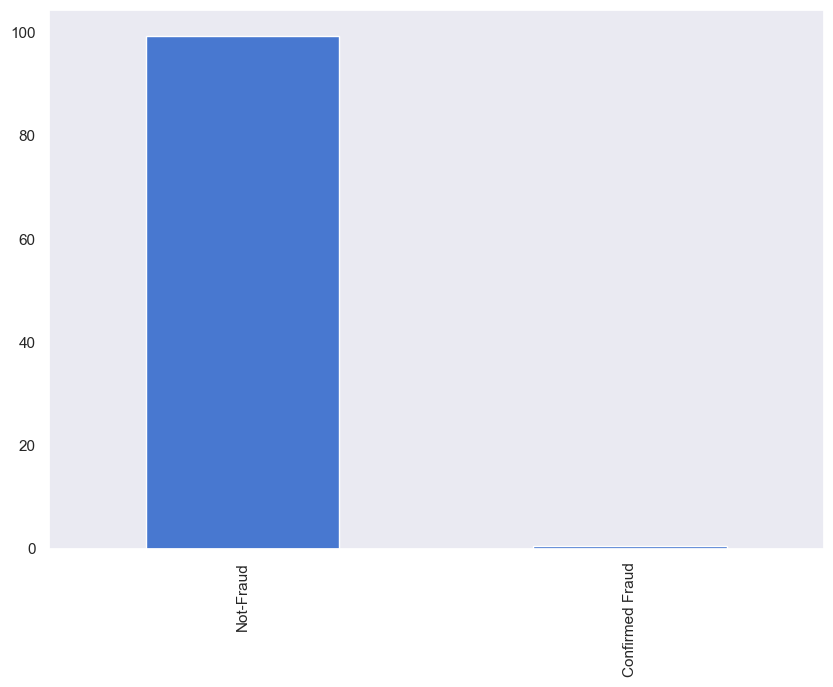

In [37]:
# Inspect the Target variable
v1 = data['is_fraud'].value_counts().rename('count') # count of classes
v2 = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes

tem = pd.concat([v1,v2], axis = 1)
tem.index = ['Not-Fraud','Confirmed Fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem


# Scatter Plot

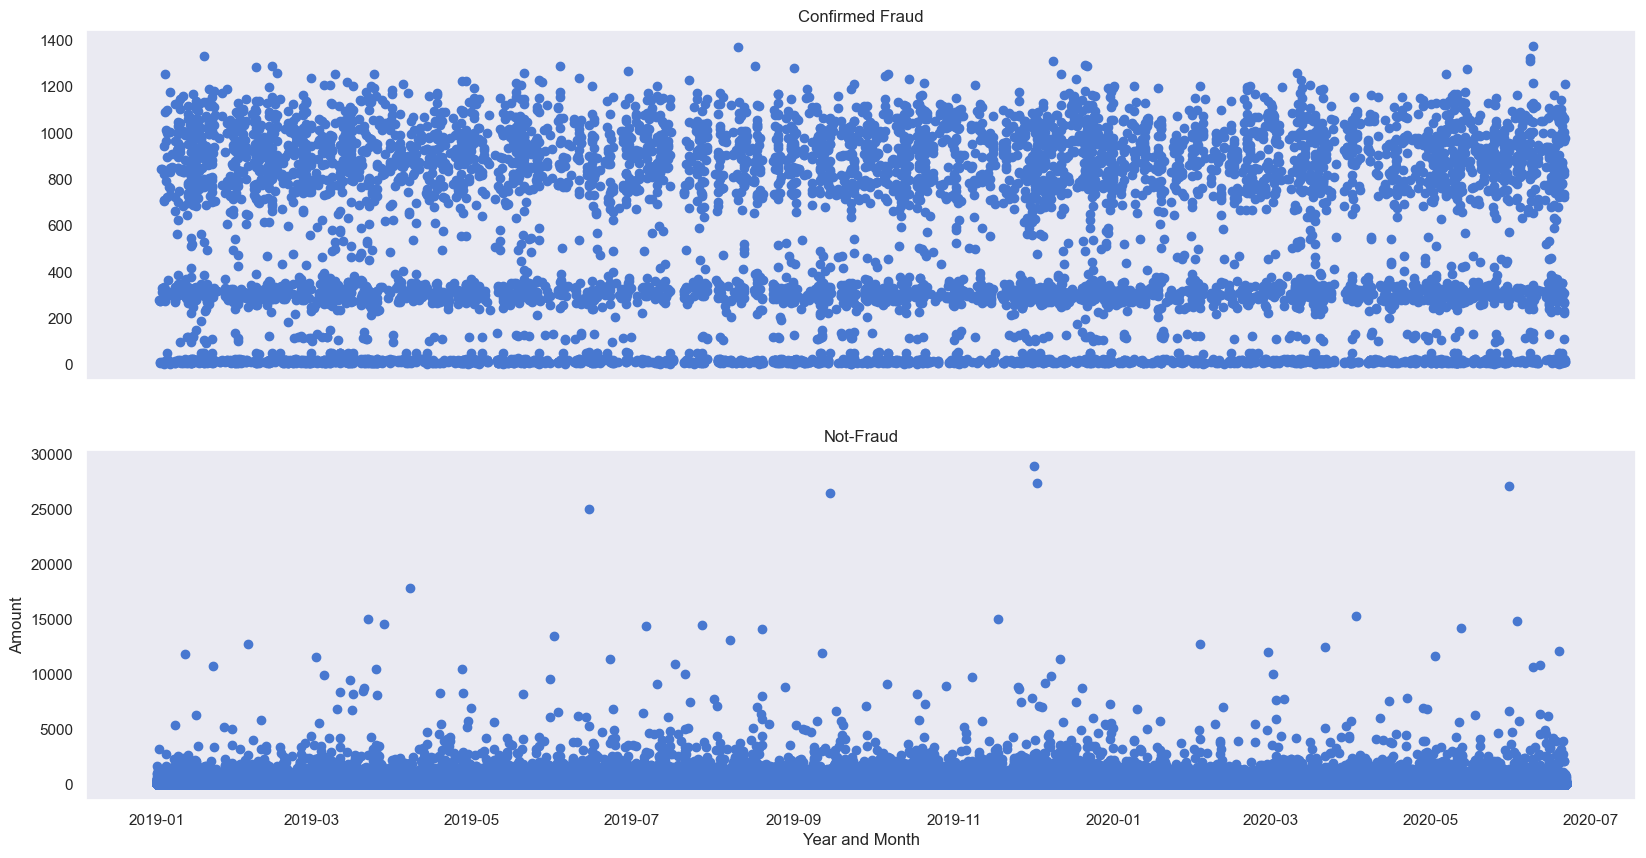

In [38]:
# checking Date and TIme vs Amount feature. scatter plot
fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(20,10))

axis_1.scatter(data.trans_date_trans_time[data.is_fraud == 1], data.amount[data.is_fraud == 1])
axis_1.set_title('Confirmed Fraud')

axis_2.scatter(data.trans_date_trans_time[data.is_fraud == 0], data.amount[data.is_fraud == 0])
axis_2.set_title('Not-Fraud')

plt.xlabel('Year and Month')
plt.ylabel('Amount')
plt.show()


# Imbalanced Correlation, Covariance and Pearson’s correlation

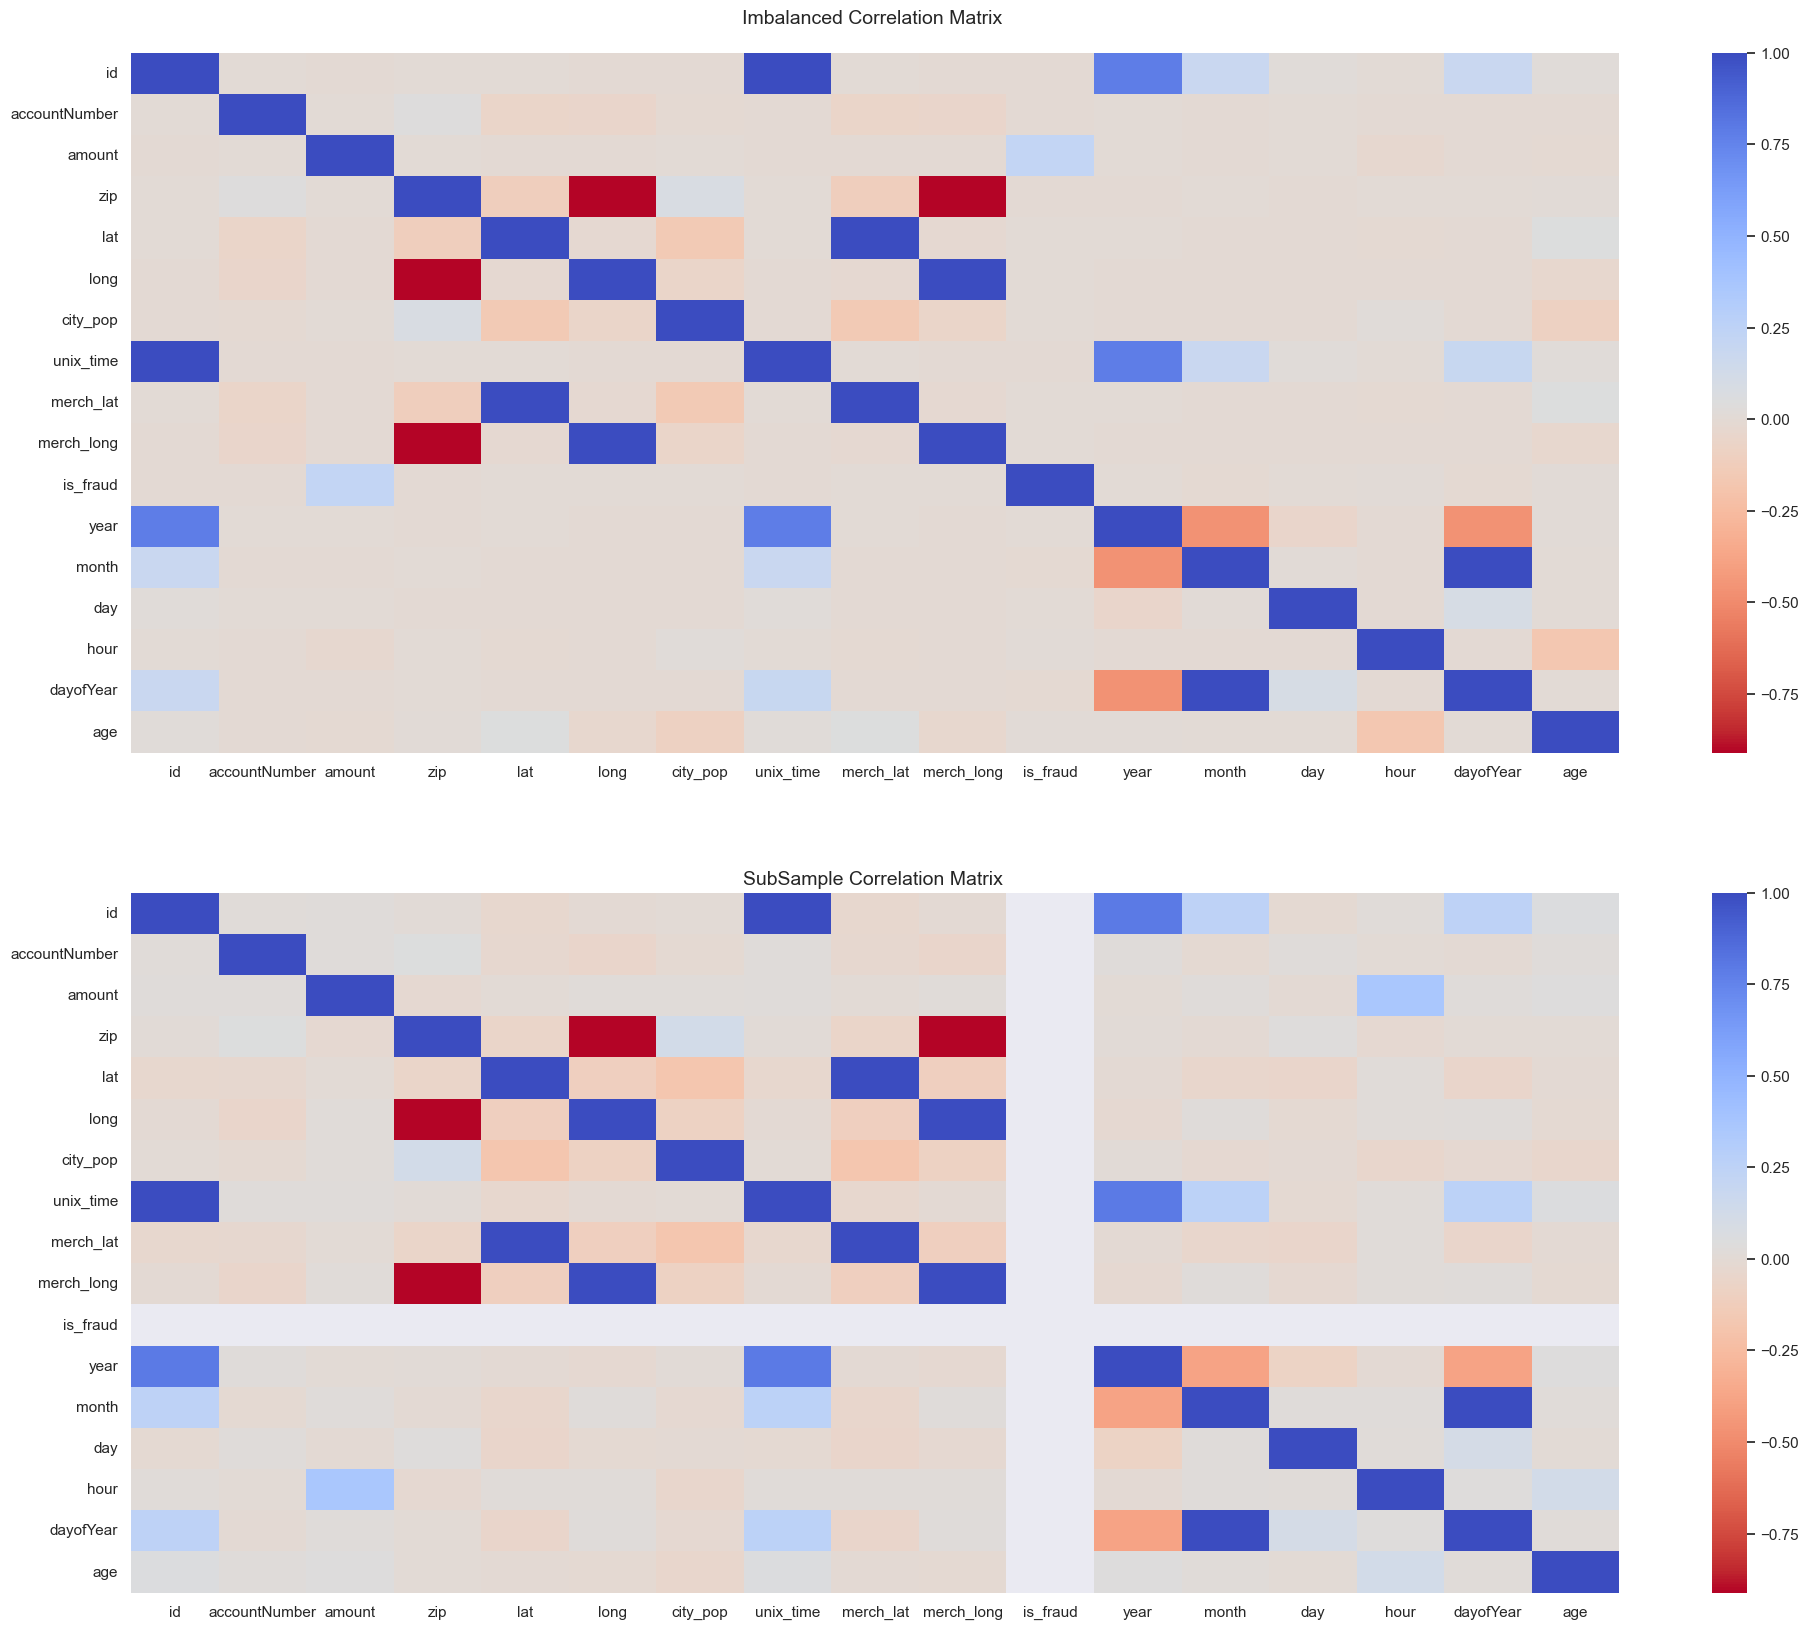

In [39]:
# Imbalanced Correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)

sub_sample_corr = subsample_analysis_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix ', fontsize=14)
plt.show()


Covariance between Confirmed Fraud Transactions and Amount:  2.6683913904857643
          is_fraud        amount
is_fraud  0.005755      2.668391
amount    2.668391  25701.232223


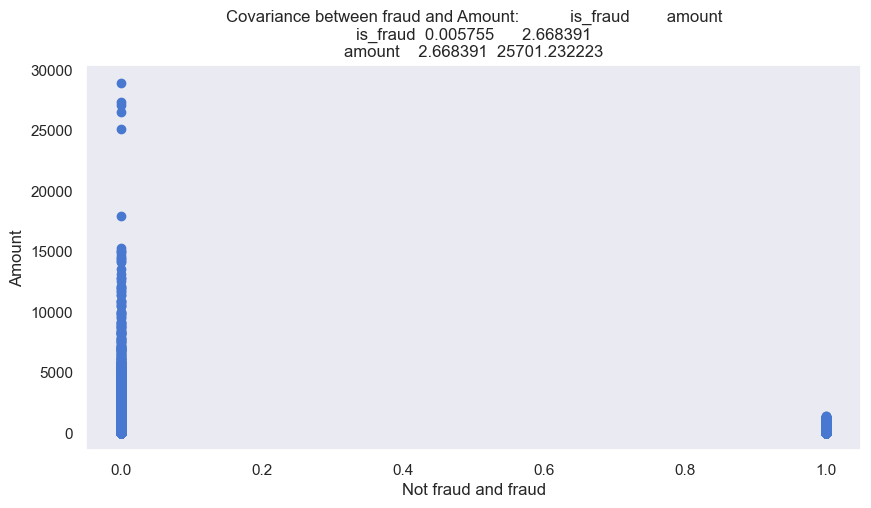

In [40]:
# Covariance

np.cov(data.amount[data.is_fraud == 1])
print("Covariance between Confirmed Fraud Transactions and Amount: ",data.amount.cov(data.is_fraud == 1))

# Select the "Class" and "Amount" columns
is_fraud_amount = data[["is_fraud", "amount"]]

# Calculate the covariance
covariance = is_fraud_amount.cov()
print(covariance)

# Create a scatter plot
plt.scatter(data["is_fraud"], data["amount"])
plt.xlabel("Not fraud and fraud")
plt.ylabel("Amount")
plt.title(f"Covariance between fraud and Amount: {covariance}")
plt.show()

is_fraud         1.000000
amount           0.219404
hour             0.013799
age              0.012250
day              0.003848
year             0.003004
city_pop         0.002136
lat              0.001894
merch_lat        0.001741
merch_long       0.001721
long             0.001721
accountNumber   -0.000981
zip             -0.002162
id              -0.004767
unix_time       -0.005078
dayofYear       -0.011974
month           -0.012409
Name: is_fraud, dtype: float64
Pearson's correlation coefficient between Not-Fraud, Confirmed Fraud and Amount: 0.21940388895887417


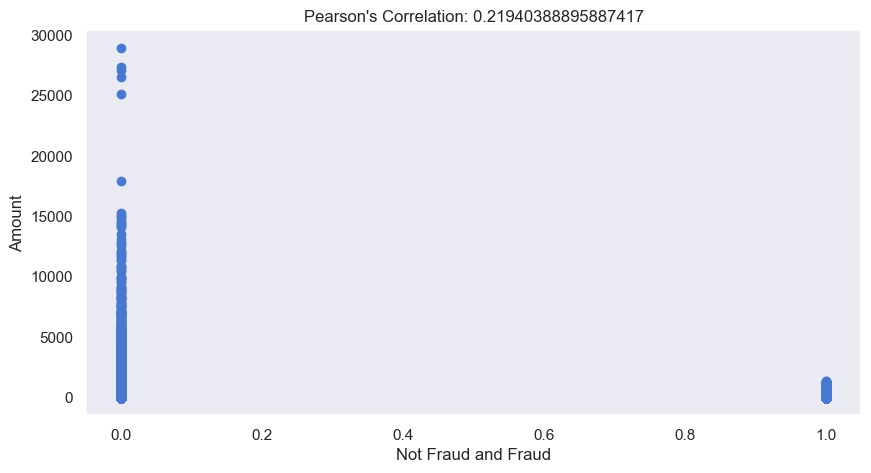

In [41]:
# Pearson’s correlation

# Drop any missing data
data.dropna(inplace=True)

# Calculate Pearson's correlation coefficient

corr_matrix = data.corr(method='pearson')
fraud_corr = corr_matrix['is_fraud'].sort_values(ascending=False)

# Print the correlation values for each feature in descending order
print(fraud_corr)

# Calculate Pearson's correlation coefficient
correlation = data["is_fraud"].corr(data["amount"], method="pearson")
print("Pearson's correlation coefficient between Not-Fraud, Confirmed Fraud and Amount:", correlation)

# Create a scatter plot
plt.scatter(data["is_fraud"], data["amount"])
plt.xlabel("Not Fraud and Fraud")
plt.ylabel("Amount")
plt.title(f"Pearson's Correlation: {correlation}")
plt.show()


# Hypothesis  Test

In [42]:
import scipy.stats as stats
# Extract the transaction amount for fraudulent and non-fraudulent transactions
fraudulent_amounts = data.loc[data['is_fraud'] == 1, 'amount']
non_fraudulent_amounts = data.loc[data['is_fraud'] == 0, 'amount']

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(fraudulent_amounts, non_fraudulent_amounts, equal_var=False)

# Interpret the results
alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction amounts between fraudulent and non-fraudulent transactions.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support a significant difference in mean transaction amounts between fraudulent and non-fraudulent transactions.")


Reject the null hypothesis. There is a significant difference in mean transaction amounts between fraudulent and non-fraudulent transactions.


#  Regression Analysis 

In [43]:
x=data.iloc[:,:-1]
y=data.iloc[:,len(data.columns)-1]
ncols = ['zip','lat','city_pop','is_fraud', 'amount']
x= x[ncols]
print("x.shape:", x.shape)
print("y.shape:", y.shape)


x.shape: (1296675, 5)
y.shape: (1296675,)


In [44]:
num = int(len(x) * 0.2)
xtrain = x[:-num]
ytrain = y[:-num]
xtest = x[-num:]
ytest = y[-num:]
print("# train:", len(xtrain))
print("# test:", len(xtest))

# train: 1037340
# test: 259335


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386764
           1       0.00      0.00      0.00      2239

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003



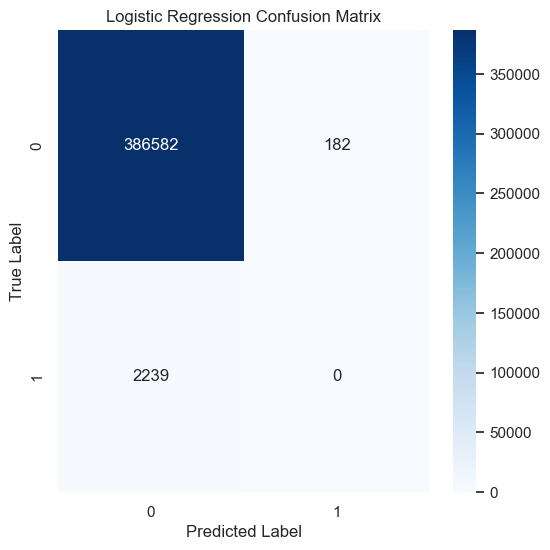

In [45]:
 # Separate the features and labels
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42)

# Fit a logistic regression model on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = lr.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the logistic regression confusion matrix
plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Conclusion

1.What do you feel was missed during the analysis?

Ans:

May be some anomalous patterns and outliers, Behavious Analysis were missed during my analysis

2.Were there any variables you felt could have helped in the analysis?

Ans: 

PosEntryMode, Secure/NonSecure data for ecomm transactions, CAVV Validation results and BIN numbers are not present in transactional information . Simillarly the customer-related variables (e.g., customer demographics, spending behavior), and additional external variables that might provide context (e.g., location, IP address, device information) are not present. The analysis would have been much better with these variables.

3.Were there any assumptions made you felt were incorrect?

Ans:

There could be some dependencies or autorelations present in data which I might not have considered

4.What challenges did you face, what did you not fully understand?

Ans:

Class Imbalance: Thedatasets often exhibit a significant class imbalance, with a majority of instances being non-fraudulent and only a small portion being fraudulent. This class imbalance has an impact on the analysis and required special handling. 